In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# <a id='0'>Content</a>

- <a href='#d'>Datasets</a>  
 - <a href='#61'> Synthetic Datasets
- <a href='#k'>KNN</a>
- <a href='#3'>Feature correlations</a>  
- <a href='#4'>Feature selection and engineering</a>
- <a href='#5'>Modeling</a>
 - <a href='#51'>kNN</a>
 - <a href='#52'>Linear models</a>
 - <a href='#53'>Tree-based models</a>
- <a href='#7'>Error Analysis</a>

## <a id='d'> Datasets
- <a href='#0'> Back to TOC

In [2]:
import os
data_dir = os.path.expanduser('~/Downloads/Data')

### Synthetic Data Sets
#### make_blobs( ), make_moons( )

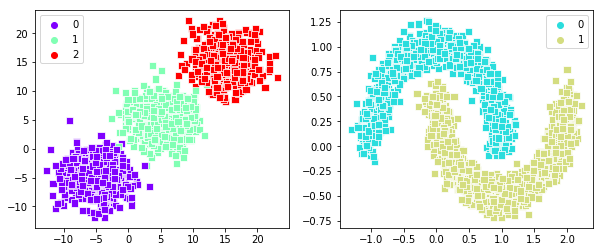

In [3]:
from sklearn.datasets import make_blobs, make_moons

_, ax = plt.subplots(1,2, figsize=(10,4))

centers = [(-5,-5),(5,5),(15,15)]
X, y = make_blobs(n_samples=2000, centers=centers, n_features=2, 
                  cluster_std=2.5, random_state=1)
sns.scatterplot(X[:,0], X[:,1], hue=y, 
                marker='s', s=50, palette='rainbow', ax=ax[0]);

X, y = make_moons(n_samples=2000, 
                  noise=0.1,    random_state=0)
sns.scatterplot(X[:,0], X[:,1], hue=y, 
                marker='s', s=50, palette='rainbow', ax=ax[1]);

#### make wave using sin( )

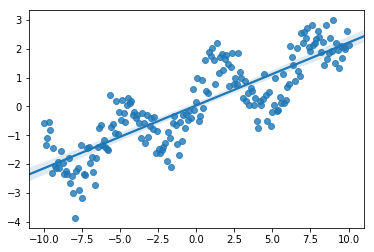

In [6]:
# make wave
def make_wave(xmin=-10, xmax=10, n_samples=200, noise=0.5, random_state=0):
    np.random.seed(random_state)
    X = np.linspace(xmin, xmax, n_samples)
    y = [np.sin(xi) + noise*np.random.randn() + 0.2*xi  for xi in X]
    return X.reshape(-1,1),y

X,y = make_wave()
sns.regplot(X,y);

### Sklearn Datasets
Classification: iris, breast_cancer, digits, wine <br>
Regression: boston/extended_boston, diabetes

In [13]:
import mglearn
#X, y = mglearn.datasets.load_extended_boston()
#print("X.shape:", X.shape)

## Algorithm

### <a id='k'> k-Nearest Neighbors
- <a href='#0'> Back to TOC
    
#### k-Neighbors classification <br>
Let's generate the data first.

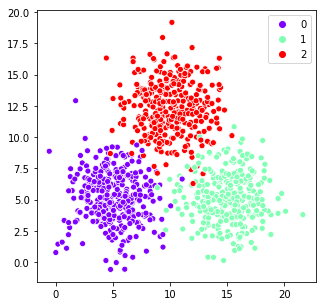

In [20]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import LogisticRegression

plt.figure(figsize=(5,5))
centers = [(5,5),(15,5),(10,12.32)]
X, y = make_blobs(n_samples=1000, centers=centers, n_features=2, 
                  cluster_std=2, random_state=1)
sns.scatterplot(X[:,0],X[:,1], hue=y, palette='rainbow');

In [29]:
np.array(cluster_names)[y]

array(['one', 'two', 'two', 'one', 'three', 'three', 'three', 'three',
       'two', 'three', 'one', 'three', 'one', 'one', 'two', 'two',
       'three', 'two', 'one', 'one', 'one', 'two', 'two', 'two', 'three',
       'one', 'one', 'three', 'one', 'one', 'three', 'two', 'two', 'one',
       'three', 'one', 'two', 'three', 'three', 'one', 'two', 'one',
       'three', 'two', 'three', 'two', 'one', 'three', 'three', 'one',
       'two', 'two', 'one', 'one', 'one', 'one', 'one', 'one', 'three',
       'two', 'two', 'one', 'two', 'three', 'one', 'three', 'three',
       'three', 'three', 'two', 'one', 'three', 'three', 'three', 'two',
       'three', 'two', 'two', 'three', 'two', 'three', 'one', 'three',
       'two', 'one', 'one', 'one', 'two', 'three', 'two', 'two', 'one',
       'three', 'two', 'three', 'one', 'two', 'one', 'two', 'one', 'two',
       'three', 'one', 'two', 'two', 'three', 'three', 'one', 'two',
       'three', 'two', 'three', 'one', 'two', 'one', 'three', 'three',
   

KNeighborsClassifier Train 0.976, Test 0.980
cv score: 0.974+-0.0122
LogisticRegression   Train 0.973, Test 0.984
cv score: 0.977+-0.0090


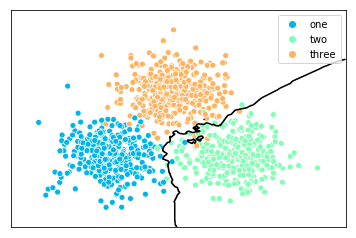

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier()
logreg = LogisticRegression()

cluster_names = np.array(['one', 'two','three'])
sns.scatterplot(X[:,0],X[:,1], hue=cluster_names[y], palette='rainbow');

mods = [knn, logreg]
for mod in mods:
    mod.fit(X_train, y_train)
    mod_name = mod.__class__.__name__
    # plot decision boundary
    if mod_name == 'KNeighborsClassifier':
    #if mod_name == 'LogisticRegression':
        mglearn.plots.plot_2d_separator(mod, X)
    
    print("{:20} Train {:.3f}, Test {:.3f}".format(mod_name,
                                        mod.score(X_train, y_train), 
                                        mod.score(X_test,  y_test))
         ) 
    
    # Cross validation
    kfold = KFold(n_splits=7, shuffle=True, random_state=0)
    scores = cross_val_score(mod, X, y, cv=kfold)
    print('cv score: {:.3f}+-{:.4f}'.format(scores.mean(), scores.std()))

### kNN: moon data
learning curve

KNeighborsClassifier Train 0.939, Test 0.888
cv score: 0.91+-0.022
LogisticRegression   Train 0.855, Test 0.832
cv score: 0.85+-0.022


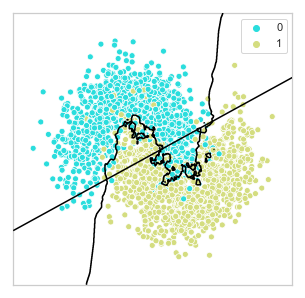

In [388]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import LogisticRegression

plt.figure(figsize=(5,5))
sns.set(style='whitegrid')

N=2000
X, y = make_moons(n_samples=N, 
                  noise=0.3,    random_state=0)
sns.scatterplot(X[:,0],X[:,1], hue=y, palette='rainbow')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier()
logreg = LogisticRegression()

mods = [knn, logreg]
for mod in mods:
    mod.fit(X_train, y_train)
    
    # plot decision boundary    
    mglearn.plots.plot_2d_separator(mod, X)
    
    print("{:20} Train {:.3f}, Test {:.3f}".format(mod.__class__.__name__, 
                                        mod.score(X_train, y_train), 
                                        mod.score(X_test,  y_test))
         )    
    kfold = KFold(n_splits=7, shuffle=True, random_state=0)
    scores = cross_val_score(mod, X, y, cv=kfold)
    print('cv score: {:.2f}+-{:.3f}'.format(scores.mean(), scores.std()))
    

Text(0.5,1,'Learning Curve')

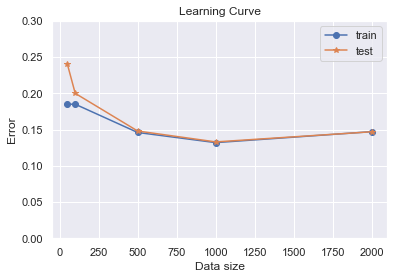

In [412]:
N=2000
X, y = make_moons(n_samples=N, 
                  noise=0.3,    random_state=0)

data_size = [50, 100, 500, 1000, 2000]
train_accuracy = []
test_accuracy  = []

for sz in data_size:
    knn = LogisticRegression() 
    #knn = KNeighborsClassifier()
    idx = np.random.choice(range(N), sz)
    X_sample, y_sample = X[idx], y[idx]
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    cv_results = cross_validate(knn, X_sample, y_sample, cv=kfold, return_train_score=True)
    train_accuracy.append(cv_results['train_score'].mean())
    test_accuracy.append(cv_results['test_score'].mean())

plt.plot(data_size, 1-np.array(train_accuracy), marker='o', label="train")
plt.plot(data_size, 1-np.array(test_accuracy),  marker='*', label="test")
    
sns.set(font_scale=1)
plt.ylabel("Error")
plt.xlabel("Data size")
plt.legend();
plt.ylim([0,0.3])
plt.title('Learning Curve');

##### Analyzing KNeighborsClassifier
Model Error vs. Model complexity

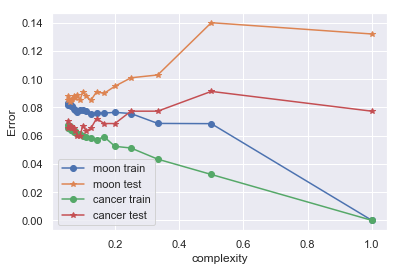

In [251]:
# accuracy as a function of hyp.param.: n_neighbors

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_validate, KFold

cancer = load_breast_cancer()
X, y = make_moons(n_samples=1000, noise=0.3,    random_state=0)
data = [(X,y), (cancer.data, cancer.target) ]

data_labels = ['moon', 'cancer']

# n_neighbors from 1 to 20
neighbors_settings = np.array(range(1, 20))

for i,(X,y) in enumerate(data):
    training_accuracy = []; test_accuracy     = []
    for n_neighbors in neighbors_settings:    
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        kfold = KFold(n_splits=7, shuffle=True, random_state=0)
        cv_results = cross_validate(clf, X,y, cv=kfold, return_train_score=True)
        
        training_accuracy.append(cv_results['train_score'].mean())
        test_accuracy.append(cv_results['test_score'].mean())

    plt.plot(1./neighbors_settings, 1-np.array(training_accuracy), marker='o', label=f"{data_labels[i]} train")
    plt.plot(1./neighbors_settings, 1-np.array(test_accuracy),     marker='*', label=f"{data_labels[i]} test")
    
sns.set(font_scale=1)
plt.ylabel("Error")
plt.xlabel("complexity")
plt.legend();

##### k-neighbors regression
Model Error vs. Model complexity

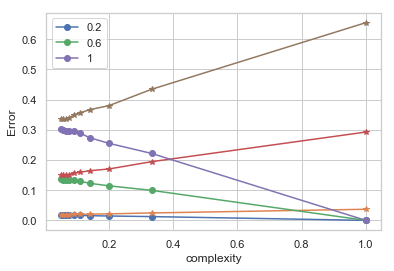

In [281]:
from sklearn.neighbors import KNeighborsRegressor

# n_neighbors from 1 to 20
neighbors_settings = np.array(range(1, 20,2))

for noise in [0.2,0.6,1]:
    X,y = make_wave(n_samples=1000, noise=noise)
    training_accuracy = []; test_accuracy     = []
    for n_neighbors in neighbors_settings:    
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)       
        
        kfold = KFold(n_splits=7, shuffle=True, random_state=0)
        cv_results = cross_validate(reg, X,y, cv=kfold, return_train_score=True)
        
        training_accuracy.append(cv_results['train_score'].mean())
        test_accuracy.append(cv_results['test_score'].mean())

    plt.plot(1./neighbors_settings, 1-np.array(training_accuracy), marker='o', label=noise)
    plt.plot(1./neighbors_settings, 1-np.array(test_accuracy),     marker='*')
#print(training_accuracy[0], test_accuracy[0])

plt.ylabel("Error")
plt.xlabel("complexity")
plt.legend();
sns.set(font_scale=1, style='whitegrid')

#### Analyzing KNeighborsRegressor

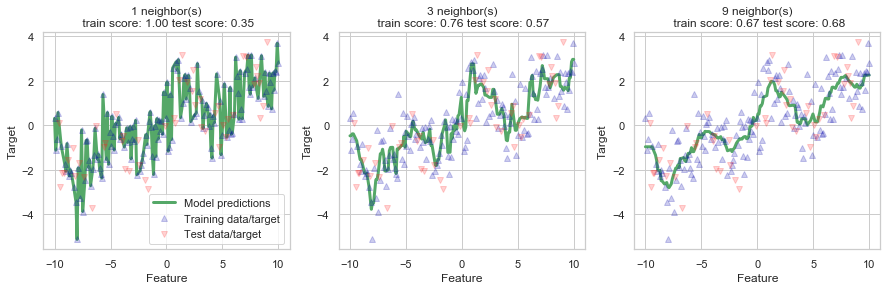

In [278]:
X,y = make_wave(n_samples=200, noise=1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for n_neighbors, ax in zip([1, 3, 9], axes):    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(np.sort(X_train,axis=0), reg.predict(np.sort(X_train,axis=0)), color='g', lw='3')
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=6, alpha=0.2)
    ax.plot(X_test,  y_test,  'v', c=mglearn.cm2(1), markersize=6, alpha=0.2)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
         n_neighbors, 
         reg.score(X_train, y_train),
         reg.score(X_test, y_test))
    )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best");

## <a id='52'> Linear models for regression
- <a href='#0'> Back to TOC

### Make wave
Error vs Noise level

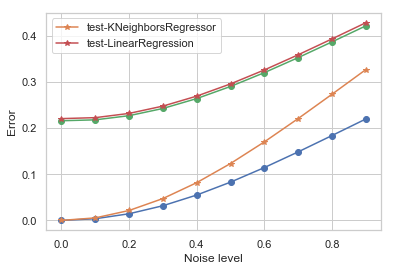

In [284]:
# compare KNN, LinearRegression
# How does noise level affect the prediction?
# Will the two models behave differently? Linear model should be more resistant to noise.

knn = KNeighborsRegressor()
lr  = LinearRegression()
mods = [knn, lr]
noises = np.arange(0,1,0.1)

for mod in mods:    
    kfold = KFold(n_splits=7, shuffle=True, random_state=0)    
    training_accuracy = []; test_accuracy     = []
    for noise in noises:
        X,y = make_wave(n_samples=1000, noise=noise)
        cv_results = cross_validate(mod, X,y, cv=kfold, return_train_score=True)        
        training_accuracy.append(cv_results['train_score'].mean())
        test_accuracy.append(cv_results['test_score'].mean())
    plt.plot(noises, 1-np.array(training_accuracy), marker='o')
    plt.plot(noises, 1-np.array(test_accuracy),     marker='*', label=f'test-{mod.__class__.__name__}')
#print(training_accuracy[0], test_accuracy[0])

plt.ylabel("Error")
plt.xlabel("Noise level")
plt.legend();
sns.set(font_scale=1, style='whitegrid')

### Auto
##### prepare data

In [3]:
proj = "/Users/William/Downloads/Backup/3-21-2019/ML/ML_ipynb/ISLR_Python/Data/Auto.csv"
auto = pd.read_csv(proj)
auto['horsepower'].loc[auto.horsepower.str.isnumeric() == False] = np.nan
auto['horsepower'] = auto.horsepower.astype(float)
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


### cv: Model Assessment, naive approach

(392, 7) (392,)


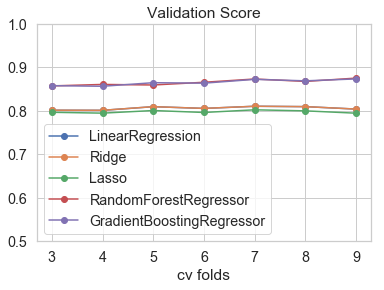

In [113]:
# Prepare X,y
X = auto.drop(['name', 'mpg'], axis=1).dropna().values
y = auto.dropna()['mpg'].values
print(X.shape, y.shape)

from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.linear_model    import LinearRegression, Ridge, Lasso
from sklearn.ensemble        import RandomForestRegressor, GradientBoostingRegressor

lr = LinearRegression()
ri = Ridge()
la = Lasso()
rf = RandomForestRegressor(random_state=0)
gb = GradientBoostingRegressor(random_state=0)
mods = [lr, ri, la, rf, gb]

_, ax = plt.subplots(1,1)
for mod in mods:    
    cv_means = []
    for c in range(3,10):
        kfold = KFold(n_splits=c, shuffle=True, random_state=1)
        scores = cross_val_score(mod, X, y, cv=kfold)        
        cv_means.append(scores.mean())    
    name = mod.__class__.__name__    
    plt.plot(cv_means, marker='o', label=name);
    #plt.boxplot(cv_scores);
    #plt.errorbar(range(3,10), cv_means, yerr=cv_std, capsize=3, marker='o', label=name)

ax.set_xticklabels(list(range(2,10)));
ax.set_ylim([0.5,1])
ax.legend(loc='best');
ax.set_title('Validation Score')
ax.set_xlabel('cv folds')
sns.set(style='whitegrid')

### cv: Model Assessment, train-test split (better)

(392, 7) (392,)


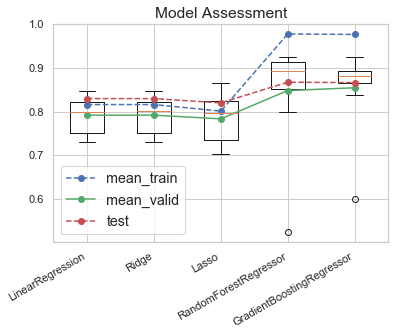

In [114]:
# Prepare X,y
X = auto.drop(['name', 'mpg'], axis=1).dropna().values
y = auto.dropna()['mpg'].values
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.linear_model    import LinearRegression, Ridge, Lasso
from sklearn.ensemble        import RandomForestRegressor, GradientBoostingRegressor

lr = LinearRegression()
ri = Ridge()
la = Lasso()
rf = RandomForestRegressor(random_state=0)
gb = GradientBoostingRegressor(random_state=0)

# inputs
mods = [lr, ri, la, rf, gb]
n_cv = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# outputs
_, ax = plt.subplots(1,1)
valid_scores = [] ; mean_valid = []; mean_train = []
model_names  = [] ; test = []
for mod in mods:
    cv =n_cv
    kfold = KFold(n_splits=cv, shuffle=True, random_state=0)
    #cv_scores = cross_val_score(mod, X_train, y_train, cv=kfold, n_jobs=-1)    
    cv_results = cross_validate(mod, X_train, y_train, cv=kfold, return_train_score=True)        
    cv_scores = cv_results['test_score'] # validation score
    mean_train.append(cv_results['train_score'].mean())
    valid_scores.append(cv_scores)
    mean_valid.append(cv_scores.mean())
    model_names.append(mod.__class__.__name__)    
    mod.fit(X_train,y_train)
    test.append(mod.score(X_test, y_test))    
plt.boxplot(valid_scores)
plt.plot(range(1, len(mods)+1), mean_train, 'bo--',  label='mean_train')
plt.plot(range(1, len(mods)+1), mean_valid, 'go-',  label='mean_valid')
plt.plot(range(1, len(mods)+1), test,       'ro--', label='test')
sns.set(font_scale=1.3, style='whitegrid')
ax.set_xticklabels(model_names, rotation=30,ha='right');
#ax.set_ylim([0.5,1])
ax.set_title('Model Assessment');
ax.legend(loc='best');

### cv: Model Selection - hyperparameter, try

(392, 7) (392,)


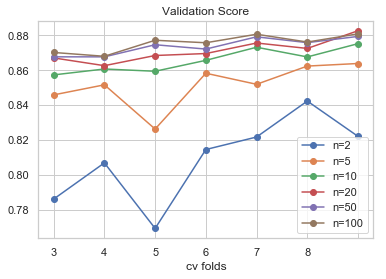

In [111]:
X = auto.drop(['name', 'mpg'], axis=1).dropna().values
y = auto.dropna()['mpg'].values
print(X.shape, y.shape)

from sklearn.model_selection import KFold
from sklearn.ensemble        import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)

_, ax = plt.subplots(1,1)
for n in [2, 5, 10, 20, 50, 100]:
    mod = RandomForestRegressor(n_estimators=n, random_state=0)
    cv_scores = []; cv_means = []; cv_std = []
    for cv in range(3,10):
        kfold = KFold(n_splits=cv, shuffle=True, random_state=1)
        scores = cross_val_score(mod, X, y, cv=kfold)
        #print(type(X), X.shape, y.shape)
        
        cv_scores.append(scores)
        cv_means.append(np.mean(scores))
        cv_std.append(np.std(scores))        
    
    name = f"n={n}"
    plt.plot(cv_means, marker='o', label=name);    

sns.set(style='whitegrid')    
ax.set_xticklabels(list(range(2,9)));
ax.set_title('Validation Score')
ax.set_xlabel('cv folds')
#ax.set_ylim([0.5,1])
ax.legend(loc='best');

### cv + Train-Valid-Test split : Model Selection - hyperparameter

In [7]:
X = auto.drop(['name', 'mpg'], axis=1).dropna().values
y = auto.dropna()['mpg'].values
#print(X.shape, y.shape)

from sklearn.model_selection import KFold
from sklearn.ensemble        import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)

test_kfold = KFold(n_splits=7, shuffle=True, random_state=0)
cvs_idx = list(test_kfold.split(X))
for i in range(7):
    trainval_idx = cvs_idx[i][0]
    test_idx     = cvs_idx[i][1]    
    X_trainval = X[trainval_idx] ; y_trainval = y[trainval_idx]
    X_test = X[test_idx] ; y_test = y[test_idx]
    
    best_score = -999
    for n in [2, 5, 20, 50, 100]:
        mod = RandomForestRegressor(n_estimators=n)
        cv_scores = []; cv_means = []; cv_std = []
        cv = 7
        kfold = KFold(n_splits=cv, shuffle=True)
        scores = cross_val_score(mod, X_trainval, y_trainval, cv=kfold, n_jobs=-1)
        if scores.mean() > best_score:
            best_score = scores.mean()
            best_parameters = {'n_estimators': n}
    rf = RandomForestRegressor(**best_parameters)
    rf.fit(X_trainval, y_trainval)
    print(np.round(rf.score(X_test, y_test), 3), best_parameters)

0.911 {'n_estimators': 50}
0.824 {'n_estimators': 100}
0.898 {'n_estimators': 100}
0.816 {'n_estimators': 50}
0.844 {'n_estimators': 50}
0.908 {'n_estimators': 100}
0.911 {'n_estimators': 50}


### cv + Train-Valid-Test split : Model Selection - hyperparameter
Grid Search

In [8]:
X = auto.drop(['name', 'mpg'], axis=1).dropna().values
y = auto.dropna()['mpg'].values
#print(X.shape, y.shape)

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble        import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)

param_grid = {'n_estimators': [2, 5, 20, 50, 100]}

test_kfold = KFold(n_splits=7, shuffle=True, random_state=0)
cvs_idx = list(test_kfold.split(X))
for i in range(7):
    trainval_idx = cvs_idx[i][0];   test_idx   = cvs_idx[i][1]    
    X_trainval   = X[trainval_idx]; y_trainval = y[trainval_idx]
    X_test = X[test_idx] ;          y_test     = y[test_idx]    
    
    grid_search = GridSearchCV(RandomForestRegressor(), 
                               param_grid, cv=7, n_jobs=-1)
    grid_search.fit(X_trainval, y_trainval)
    print(np.round(grid_search.score(X_test, y_test), 3), grid_search.best_params_)

0.896 {'n_estimators': 100}
0.829 {'n_estimators': 50}
0.889 {'n_estimators': 100}
0.84 {'n_estimators': 100}
0.845 {'n_estimators': 50}
0.913 {'n_estimators': 100}
0.913 {'n_estimators': 50}


In [27]:
X = auto.drop(['name', 'mpg'], axis=1).dropna().values
y = auto.dropna()['mpg'].values
#print(X.shape, y.shape)

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble        import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)

param_grid = {'n_estimators': [2, 5, 20, 50, 100]}

test_kfold = KFold(n_splits=7, shuffle=True, random_state=0)
cvs_idx = list(test_kfold.split(X))
for i in range(7):
    trainval_idx = cvs_idx[i][0];   test_idx   = cvs_idx[i][1]    
    X_trainval   = X[trainval_idx]; y_trainval = y[trainval_idx]
    X_test = X[test_idx] ;          y_test     = y[test_idx]    
    kfold = KFold(n_splits=7, shuffle=True, random_state=1)
    grid_search = GridSearchCV(RandomForestRegressor(), 
                               param_grid, cv=kfold, n_jobs=-1)
    grid_search.fit(X_trainval, y_trainval)
    print(np.round(grid_search.score(X_test, y_test), 3), grid_search.best_params_)

0.9 {'n_estimators': 100}
0.819 {'n_estimators': 100}
0.906 {'n_estimators': 50}
0.817 {'n_estimators': 100}
0.844 {'n_estimators': 20}
0.906 {'n_estimators': 100}
0.912 {'n_estimators': 100}


#### Leave-one-out: NOT working with auto data (iris data works)

In [14]:
X = auto.drop(['name', 'mpg'], axis=1).dropna().values
y = auto.dropna()['mpg'].values
print(X.shape, y.shape)

from sklearn.model_selection import KFold, LeaveOneOut, GridSearchCV
from sklearn.ensemble        import RandomForestRegressor

test_kfold = KFold(n_splits=2, shuffle=True, random_state=0)
cvs_idx = list(test_kfold.split(X))
for i in range(2):
    trainval_idx = cvs_idx[i][0]
    test_idx     = cvs_idx[i][1]    
    X_trainval = X[trainval_idx] ; y_trainval = y[trainval_idx]
    X_test = X[test_idx] ; y_test = y[test_idx]
    
    best_score = -999
    best_parameters = {}
    for n in [2, 5]:
        mod = RandomForestRegressor(n_estimators=n)
        
        loo = LeaveOneOut()
        scores = cross_val_score(mod, X_trainval, y_trainval, cv=loo)
        #print(scores)
        if scores.mean() > best_score:
            best_score = scores.mean()
            best_parameters = {'n_estimators': n}
            
    rf = RandomForestRegressor(**best_parameters)
    rf.fit(X_trainval, y_trainval)
    print(best_parameters, np.round(rf.score(X_test, y_test), 3))

(392, 7) (392,)
{} 0.855
{} 0.855


#### cv (Grid Search): no best model/parameter returned

In [15]:
X = auto.drop(['name', 'mpg'], axis=1).dropna().values
y = auto.dropna()['mpg'].values
#print(X.shape, y.shape)

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.ensemble        import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)

param_grid = {'n_estimators': [2, 5, 20, 50, 100]}

kfold = KFold(n_splits=7, shuffle=True, random_state=0)

grid_search = GridSearchCV(rf, param_grid, cv=kfold, n_jobs=-1)
scores = cross_val_score(grid_search, X,y, cv=kfold)
np.set_printoptions(precision=3)

print(scores)
print("{:.2f}+-{:.3f}".format(scores.mean(), scores.std()))

[0.897 0.814 0.899 0.823 0.843 0.916 0.916]
0.87+-0.041


### Boston Housing

### cv: Model Assessment

In [ ]:
def model_assessment(mods, X, y, n_cv_train_test, n_cv_valid):
    '''
    Output: a plot of model assessment
    Output: train_score, valid_score, test_score
    '''


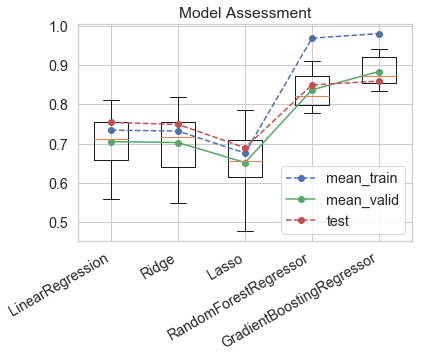

In [112]:
# prepare X,y
from sklearn.datasets import load_boston, load_diabetes
data = load_boston(); X = data.data; y = data.target

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble     import RandomForestRegressor, GradientBoostingRegressor

lr = LinearRegression(); ri = Ridge(); la = Lasso()
rf = RandomForestRegressor(random_state=0)
gb = GradientBoostingRegressor(random_state=0)

# inputs
mods = [lr, ri, la, rf, gb]
n_cv = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

# outputs
_, ax = plt.subplots(1,1)
valid_scores = [] ; mean_valid = []; mean_train = []
model_names  = [] ; test = []
for mod in mods:
    cv =n_cv
    kfold = KFold(n_splits=cv, shuffle=True, random_state=0)
    #cv_scores = cross_val_score(mod, X_train, y_train, cv=kfold, n_jobs=-1)    
    cv_results = cross_validate(mod, X_train, y_train, cv=kfold, return_train_score=True)        
    cv_scores = cv_results['test_score'] # validation score
    mean_train.append(cv_results['train_score'].mean())
    valid_scores.append(cv_scores)
    mean_valid.append(cv_scores.mean())
    model_names.append(mod.__class__.__name__)    
    mod.fit(X_train,y_train)
    test.append(mod.score(X_test, y_test))    
plt.boxplot(valid_scores)
plt.plot(range(1, len(mods)+1), mean_train, 'bo--',  label='mean_train')
plt.plot(range(1, len(mods)+1), mean_valid, 'go-',  label='mean_valid')
plt.plot(range(1, len(mods)+1), test,       'ro--', label='test')
sns.set(font_scale=1.3, style='whitegrid')
ax.set_xticklabels(model_names, rotation=30,ha='right');
#ax.set_ylim([0.5,1])
ax.set_title('Model Assessment');
ax.legend(loc='best');

### cv + Train-Valid-Test split: Model Selection - hyperparameter
grid search

In [94]:
from sklearn.datasets import load_boston
data = load_boston()
X = data.data; y = data.target
import mglearn
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble        import RandomForestRegressor, GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=0)

param_grid = {
              'max_depth'   : [1   , 2   ,3    ,4   ,5   ,7   ,10  ,15, 20],  # 9 cols
              'learning_rate':[0.02, 0.04, 0.08, 0.1, 0.2, 0.4, 0.8, 1]}      # 8 rows

n_cv = 7
test_kfold = KFold(n_splits=n_cv, shuffle=True, random_state=0)
cvs_idx = list(test_kfold.split(X))

heatmap_scores = []
for i in range(n_cv):
    trainval_idx = cvs_idx[i][0];   test_idx   = cvs_idx[i][1]    
    X_trainval   = X[trainval_idx]; y_trainval = y[trainval_idx]
    X_test = X[test_idx] ;          y_test     = y[test_idx]
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    grid_search = GridSearchCV(gb, param_grid, cv=kfold, n_jobs=-1)
    
    grid_search.fit(X_trainval, y_trainval)
    df = pd.DataFrame(grid_search.cv_results_)
    
    print("{:.2f}+-{:.3f}".format(df.mean_test_score.mean(), df.mean_test_score.std()))
    print(np.round(grid_search.score(X_test, y_test), 3), grid_search.best_params_)
    
    scores = np.array(df.mean_test_score).reshape(8, 9)
    heatmap_scores.append(scores)

0.79+-0.058
0.746 {'learning_rate': 0.08, 'max_depth': 3}
0.80+-0.047
0.867 {'learning_rate': 0.2, 'max_depth': 3}
0.80+-0.054
0.93 {'learning_rate': 0.1, 'max_depth': 3}
0.80+-0.061
0.771 {'learning_rate': 0.2, 'max_depth': 3}
0.78+-0.058
0.86 {'learning_rate': 0.1, 'max_depth': 3}
0.79+-0.054
0.925 {'learning_rate': 0.2, 'max_depth': 3}
0.77+-0.059
0.936 {'learning_rate': 0.4, 'max_depth': 3}


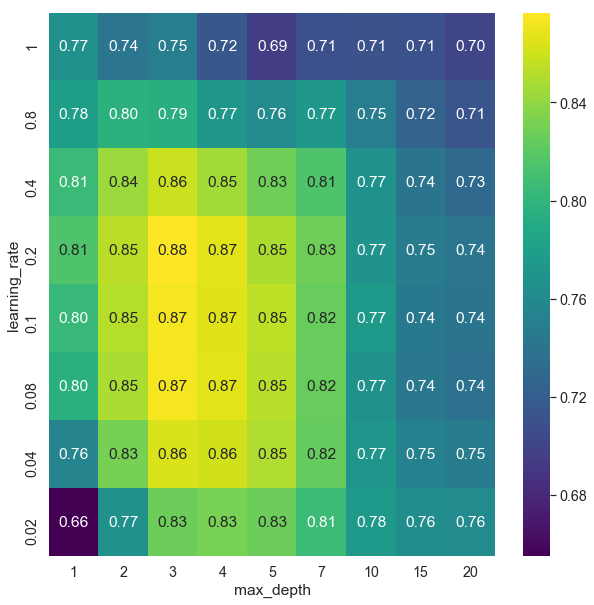

In [95]:
h_avg = 0
for h in heatmap_scores:
    h_avg += h/len(heatmap_scores)
    
plt.figure(figsize=(10,10))
ax = sns.heatmap(np.flipud(h_avg), cmap='viridis', annot=True, fmt='.2f')
x_lbl = list(param_grid.keys())[0]
ax.set_xticklabels(param_grid[x_lbl]);
ax.set_xlabel(x_lbl)

y_lbl = list(param_grid.keys())[1]
ax.set_ylabel(y_lbl)
ax.set_yticklabels(list(reversed(param_grid[y_lbl])));

#### Boston Housing Extended

In [97]:
# extended boston dataset, regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors    import KNeighborsRegressor

X, y = mglearn.datasets.load_extended_boston()
print(X.shape, y.shape)

knn = KNeighborsRegressor()
lr  = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

for mod in [knn, lr, ridge, lasso, elastic]:    
    mod.fit(X_train, y_train)
    print('{:25} train: {:.3f} test: {:.3f}'.format(
        mod.__class__.__name__, 
        mod.score(X_train,y_train), mod.score(X_test, y_test)))

(506, 104) (506,)
KNeighborsRegressor       train: 0.833 test: 0.559
LinearRegression          train: 0.952 test: 0.607
Ridge                     train: 0.886 test: 0.753
Lasso                     train: 0.293 test: 0.209
ElasticNet                train: 0.328 test: 0.222


(506, 104) (506,)


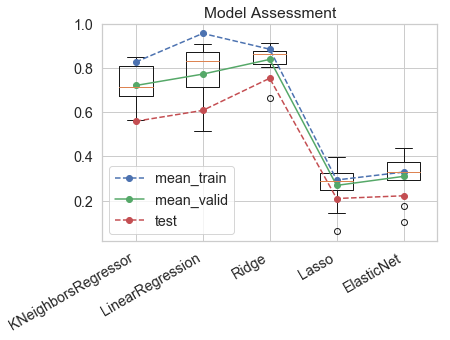

In [102]:
# extended boston dataset, regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors    import KNeighborsRegressor

X, y = mglearn.datasets.load_extended_boston()
print(X.shape, y.shape)

knn = KNeighborsRegressor()
lr  = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

_, ax = plt.subplots(1,1)

valid_scores = [] ; mean_valid = []; mean_train = []
model_names  = [] ; test = []

mods = [knn, lr, ridge, lasso, elastic]
for mod in mods:
    cv =10
    kfold = KFold(n_splits=cv, shuffle=True, random_state=0)
    #cv_scores = cross_val_score(mod, X_train, y_train, cv=kfold, n_jobs=-1)    
    cv_results = cross_validate(mod, X_train, y_train, cv=kfold, return_train_score=True)    
    
    cv_scores = cv_results['test_score'] # validation score
    mean_train.append(cv_results['train_score'].mean())
    valid_scores.append(cv_scores)
    mean_valid.append(cv_scores.mean())
    model_names.append(mod.__class__.__name__)
    
    mod.fit(X_train,y_train)
    test.append(mod.score(X_test, y_test))
    
plt.boxplot(valid_scores)
plt.plot(range(1, len(mods)+1), mean_train, 'bo--',  label='mean_train')
plt.plot(range(1, len(mods)+1), mean_valid, 'go-',  label='mean_valid')
plt.plot(range(1, len(mods)+1), test,       'ro--', label='test')

sns.set(font_scale=1.3, style='whitegrid')
ax.set_xticklabels(model_names, rotation=30,ha='right');
#ax.set_ylim([0.5,1])
ax.set_title('Model Assessment');
ax.legend(loc=3);

In [57]:
# extended boston dataset, regression
import mglearn
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors    import KNeighborsRegressor

X, y = mglearn.datasets.load_extended_boston()
print(X.shape, y.shape)

knn = KNeighborsRegressor()
lr  = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()

cv = 7
for mod in [knn, lr, ridge, lasso, elastic]:
    kfold = KFold(n_splits=cv, shuffle=True, random_state=0)
    cv_results = cross_validate(mod, X, y, cv=kfold, return_train_score=True)
    print('{:25} train: {:.3f}+-{:.4f} test: {:.3f}+-{:.4f}'.format(
        mod.__class__.__name__, 
        cv_results['train_score'].mean(), cv_results['train_score'].std(), 
        cv_results['test_score'].mean(),  cv_results['test_score'].std()))   

(506, 104) (506,)
KNeighborsRegressor       train: 0.835+-0.0106 test: 0.711+-0.1261
LinearRegression          train: 0.933+-0.0055 test: 0.777+-0.1599
Ridge                     train: 0.864+-0.0101 test: 0.819+-0.0820
Lasso                     train: 0.244+-0.0246 test: 0.228+-0.0411
ElasticNet                train: 0.281+-0.0188 test: 0.269+-0.0616


#### Model Coefficient

In [176]:
# make_wave dataset
from sklearn.linear_model import LinearRegression

X = np.linspace(-10,10,200).reshape(-1,1)
y = [np.sin(x) + 0.5*np.random.randn() + 0.2*x for x in X]
lr = LinearRegression().fit(X,y)

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [[0.22286314]]
lr.intercept_: [0.02068048]


##### Ridge regression

In [317]:
from sklearn.linear_model import Ridge

ridge   = Ridge(alpha=1  ).fit(X_train, y_train)
ridge10 = Ridge(alpha=10 ).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

mods = [ridge, ridge10, ridge01]

for mod in mods:
    mod.fit(X_train, y_train)
    print(str(mod).split(',')[0])
    print("Training/Test: {:6.3f} {:6.3f}".format(mod.score(X_train, y_train), mod.score(X_test, y_test)))    

Ridge(alpha=1
Training/Test:  0.883  0.699
Ridge(alpha=10
Training/Test:  0.789  0.576
Ridge(alpha=0.1
Training/Test:  0.922  0.715


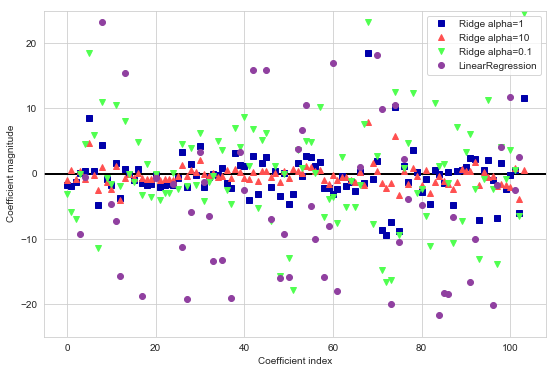

In [319]:
plt.figure(figsize=(9,6))
plt.plot(ridge.coef_,   's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

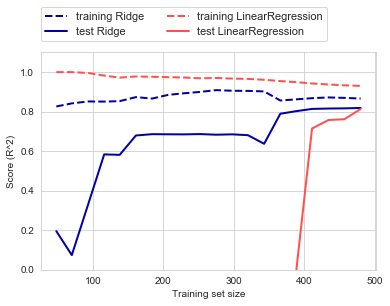

In [320]:
# Ridge needs much less data than LR to perform well
mglearn.plots.plot_ridge_n_samples()

##### Lasso

In [329]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lasso  = Lasso(alpha=1   ).fit(X_train, y_train)
lasso2 = Lasso(alpha=1e-2).fit(X_train, y_train)
lasso4 = Lasso(alpha=1e-4).fit(X_train, y_train)

mods = [lasso, lasso2, lasso4]

for mod in mods:
    mod.fit(X_train, y_train)
    print(str(mod).split(',')[0])
    print("Training/Test: {:6.3f} {:6.3f} N_feature: {:4d}".format(
        mod.score(X_train, y_train), mod.score(X_test, y_test),
        np.sum(mod.coef_ != 0)
    ))

Lasso(alpha=1
Training/Test:  0.282  0.183 N_feature:    3
Lasso(alpha=0.01
Training/Test:  0.890  0.693 N_feature:   28
Lasso(alpha=0.0001
Training/Test:  0.935  0.637 N_feature:   98


Text(0,0.5,'Coefficient magnitude')

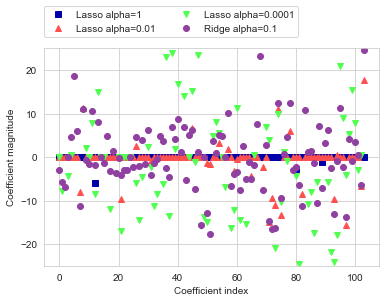

In [330]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

##### Linear models for classification

LogisticRegression
Training/Test:  0.906  0.867
LinearSVC
Training/Test:  0.894  0.900


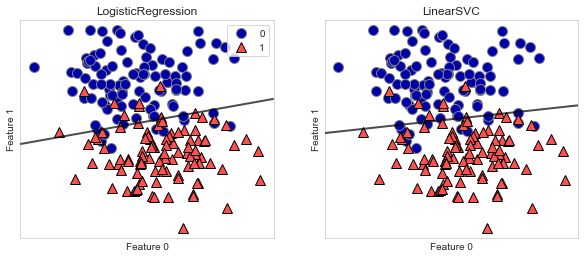

In [353]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

#X, y = mglearn.datasets.make_forge()
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=1.5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for model, ax in zip([LogisticRegression(), LinearSVC()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7);
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    print(clf.__class__.__name__)
    print("Training/Test: {:6.3f} {:6.3f}".format(clf.score(X_train, y_train), clf.score(X_test, y_test)))
axes[0].legend()

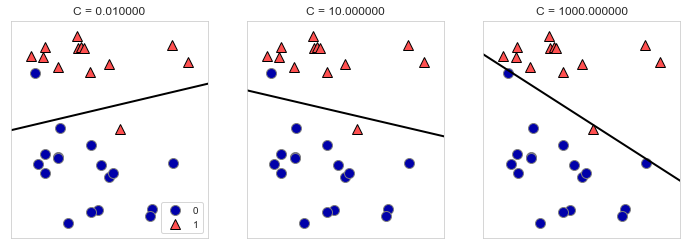

In [354]:
mglearn.plots.plot_linear_svc_regularization()

In [404]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
print(X_train.shape)

knn  = KNeighborsClassifier(n_neighbors=10)
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
logreg = LogisticRegression(C=100)

clfs = [knn, tree, logreg]

for clf in clfs:
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__)
    print("Training/Test: {:6.3f} {:6.3f}".format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

(426, 30)
KNeighborsClassifier
Training/Test:  0.934  0.944
DecisionTreeClassifier
Training/Test:  0.995  0.951
LogisticRegression
Training/Test:  0.972  0.965


In [368]:
logreg    = LogisticRegression()
logreg100 = LogisticRegression(C=100)
logreg001 = LogisticRegression(C=0.01)

clfs = [logreg, logreg100, logreg001]

for clf in clfs:
    clf.fit(X_train, y_train)
    print('C={:6.2f}'.format(clf.get_params()['C']))
    print("Training/Test: {:6.3f} {:6.3f}".format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

C=  1.00
Training/Test:  0.953  0.958
C=100.00
Training/Test:  0.972  0.965
C=  0.01
Training/Test:  0.934  0.930


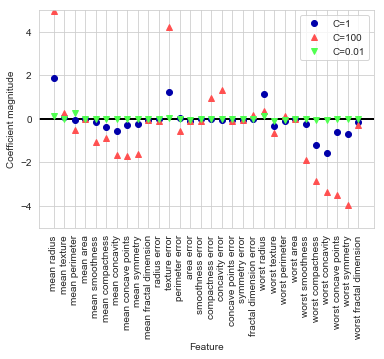

In [370]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

l1 penalty, C=  0.01
Training/Test:  0.918  0.930
l1 penalty, C=  1.00
Training/Test:  0.960  0.958
l1 penalty, C=100.00
Training/Test:  0.986  0.979


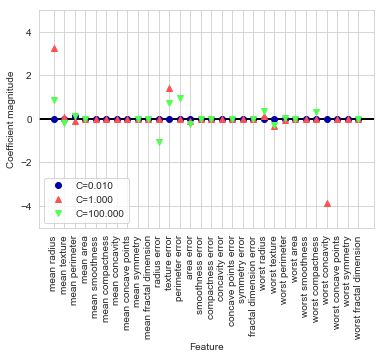

In [408]:
for C, marker in zip([0.01, 1, 100], ['o', '^', 'v']):    
    clf = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print('l1 penalty, C={:6.2f}'.format(clf.get_params()['C']))
    print("Training/Test: {:6.3f} {:6.3f}".format(clf.score(X_train, y_train), clf.score(X_test, y_test)))
    
    plt.plot(clf.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

##### Linear models for multiclass classification
\begin{align*}
\end{align*}

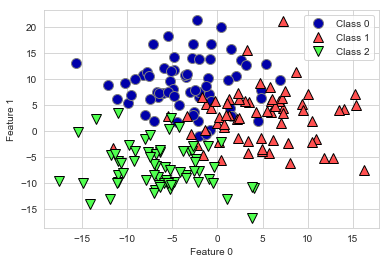

In [424]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, random_state=42, cluster_std=5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

Score:  0.860
Coefficient shape:  (3, 2)
Intercept shape:  (3,)


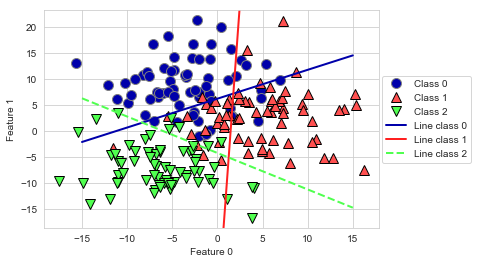

In [428]:
linear_svm = LinearSVC().fit(X, y)
print("Score: {:6.3f}".format(linear_svm.score(X, y)))
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=color)
#plt.ylim(-10, 15)
#plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3));

Text(0,0.5,'Feature 1')

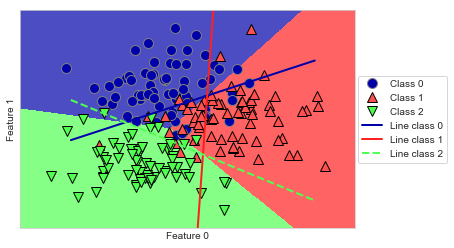

In [429]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Score:  0.860


Text(0,0.5,'Feature 1')

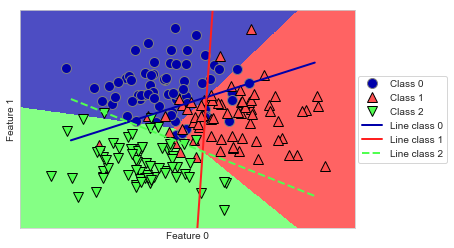

In [432]:
# instantiate model and fit it in one line
logreg = LogisticRegression()
logreg.fit(X,y)
print("Score: {:6.3f}".format(logreg.score(X, y)))

#y_pred = logreg.fit(X_train, y_train).predict(X_test)
#y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

mglearn.plots.plot_2d_classification(logreg, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logreg.coef_, logreg.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Score:  0.910


Text(0,0.5,'Feature 1')

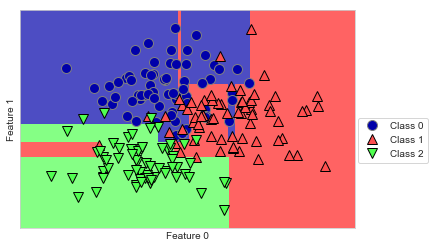

In [436]:
# instantiate model and fit it in one line
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X,y)
print("Score: {:6.3f}".format(tree.score(X, y)))

#y_pred = logreg.fit(X_train, y_train).predict(X_test)
#y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

mglearn.plots.plot_2d_classification(tree, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
#for coef, intercept, color in zip(tree.coef_, logreg.intercept_, mglearn.cm3.colors):
#    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Naive Bayes Classifiers

In [54]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [55]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### Decision trees

##### Building decision trees

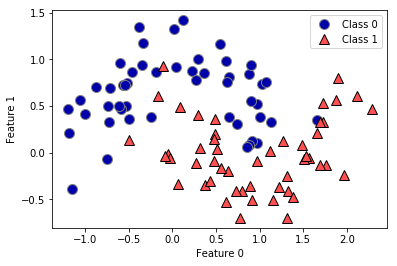

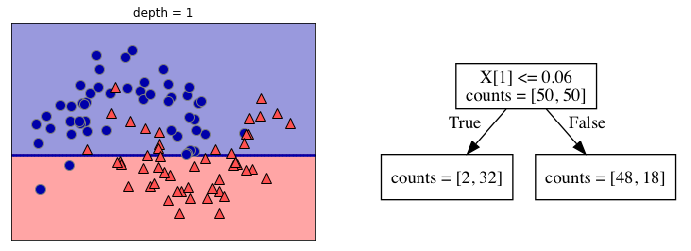

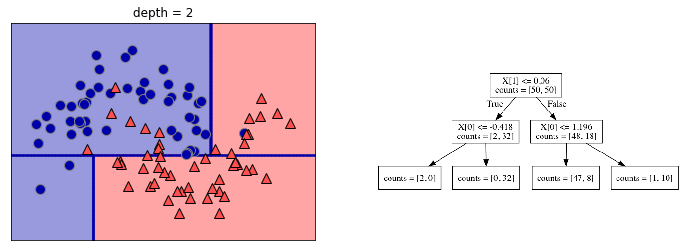

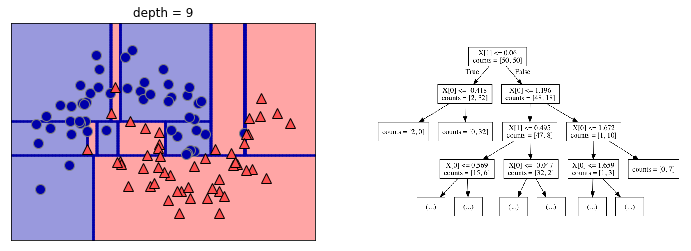

In [7]:
mglearn.plots.plot_tree_progressive()

##### Controlling complexity of decision trees

In [437]:
from sklearn.datasets        import load_iris, load_breast_cancer, load_digits, load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=42) #, stratify=cancer.target)
print(X_train.shape)

print(np.bincount(cancer.target), cancer.target_names)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Training/Test: {:6.3f} {:6.3f}".format(tree.score(X_train, y_train), tree.score(X_test, y_test)))

(426, 30)
[212 357] ['malignant' 'benign']
Training/Test:  1.000  0.930


In [438]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)
print("Training/Test: {:6.3f} {:6.3f}".format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Training/Test:  0.995  0.951


#### Analyzing Decision Trees

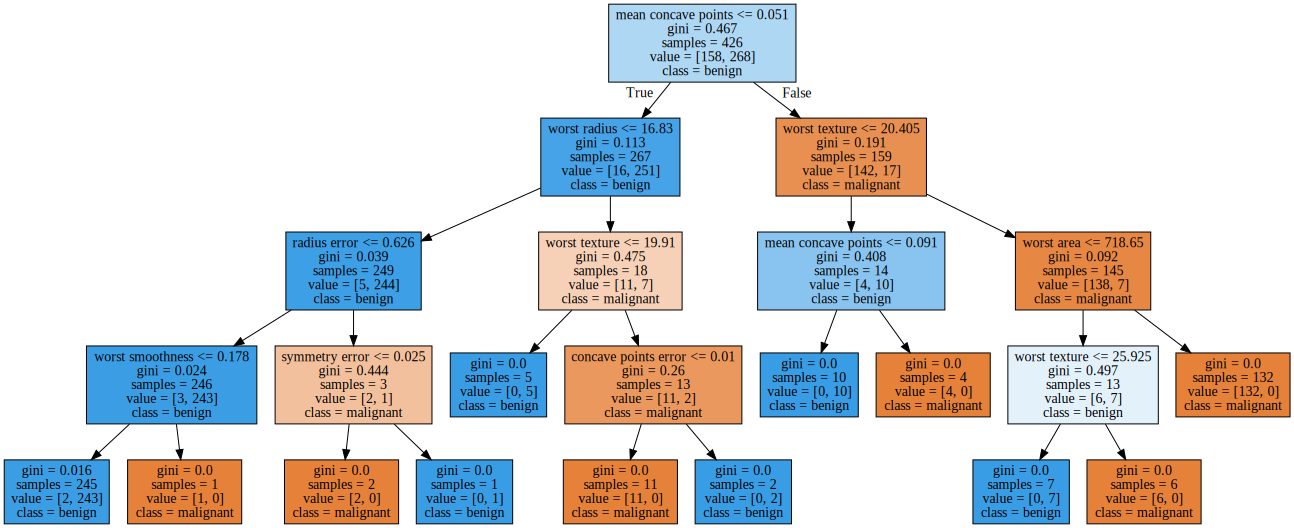

In [445]:
import graphviz
from sklearn.tree import export_graphviz

clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)

export_graphviz(clf, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=True, filled=True)

with open("tree.dot") as f: dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Feature Importance in trees

In [446]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.    0.    0.    0.    0.    0.    0.    0.725 0.    0.    0.013 0.
 0.    0.    0.008 0.    0.    0.017 0.    0.    0.059 0.126 0.008 0.035
 0.01  0.    0.    0.    0.    0.   ]


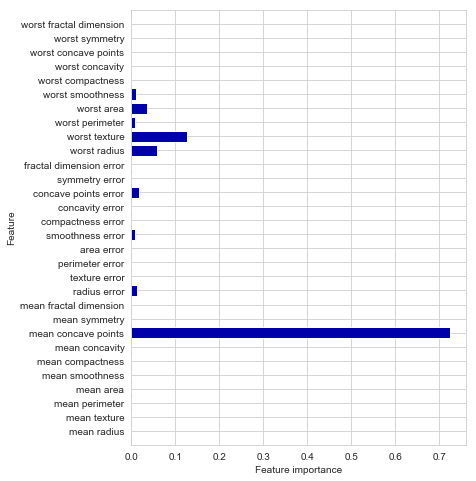

In [450]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.figure(figsize=(6,8))
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


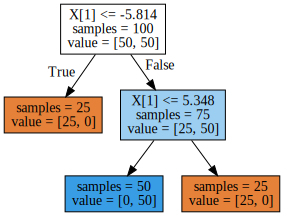

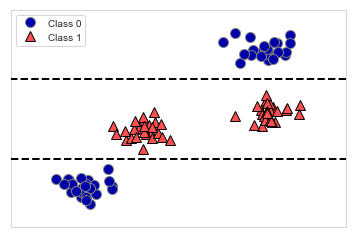

In [451]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

date     price
0  1957.0  4.11e+08
1  1959.0  6.79e+07
2  1960.0  5.24e+06
3  1965.0  2.64e+06
4  1970.0  7.34e+05

Text(0,0.5,'Price in $/Mbyte')

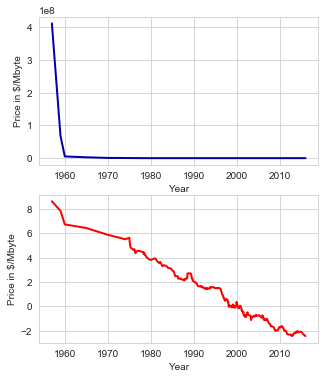

In [502]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"), index_col=0)
display(ram_prices.head())

figs, axes = plt.subplots(2,1, figsize=(5, 6), sharex=True)

plt.subplot(2,1,1)
plt.plot(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

plt.subplot(2,1,2)
#axes[1].semilogy(ram_prices.date, ram_prices.price, color='r')
plt.plot(ram_prices.date, np.log10(ram_prices.price), color='r')

plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [479]:
from sklearn.tree import DecisionTreeRegressor

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test  = ram_prices[ram_prices.date >= 2000]
data_train.head()

date     price
0  1957.0  4.11e+08
1  1959.0  6.79e+07
2  1960.0  5.24e+06
3  1965.0  2.64e+06
4  1970.0  7.34e+05

In [482]:
data_train.date.shape

(202,)

In [490]:
# predict prices based on date
X_train = data_train.date.values.reshape(-1,1) #[:, np.newaxis]
X_test  = data_test.date.values.reshape(-1,1)

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
y_test  = np.log(data_test.price)

tree       = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

print("Training/Test: {:6.3f} {:6.3f}".format(tree.score(X_train, y_train), tree.score(X_test, y_test)))
print("Training/Test: {:6.3f} {:6.3f}".format(linear_reg.score(X_train, y_train), linear_reg.score(X_test, y_test)))

# predict on all data
X_all = ram_prices.date.values.reshape(-1,1) #[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr   = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Training/Test:  0.980 -3.502
Training/Test:  0.959  0.830


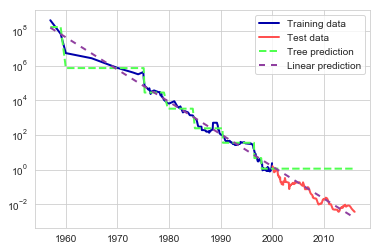

In [488]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date,  data_test.price,  label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr,   label="Linear prediction")
plt.legend()

#### Ensembles of Decision Trees
##### Random forests

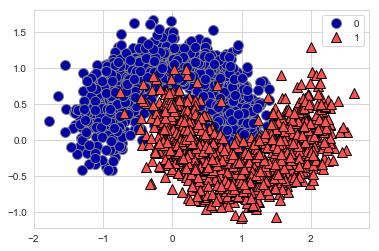

In [498]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=2000, noise=0.25, random_state=0)
mglearn.discrete_scatter(X[:,0], X[:,1], y);
plt.legend()

In [499]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
log = LogisticRegression()
svc = LinearSVC()
tree= DecisionTreeClassifier(max_depth=5)
forest = RandomForestClassifier(n_estimators=20, random_state=0)

clfs = [knn, log, svc, tree, forest]
for clf in clfs:
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__)
    print("Training/Test: {:6.3f} {:6.3f}".format(clf.score(X_train, y_train), clf.score(X_test, y_test)))    

KNeighborsClassifier
Training/Test:  0.958  0.926
LogisticRegression
Training/Test:  0.861  0.856
LinearSVC
Training/Test:  0.859  0.852
DecisionTreeClassifier
Training/Test:  0.949  0.924
RandomForestClassifier
Training/Test:  0.999  0.934


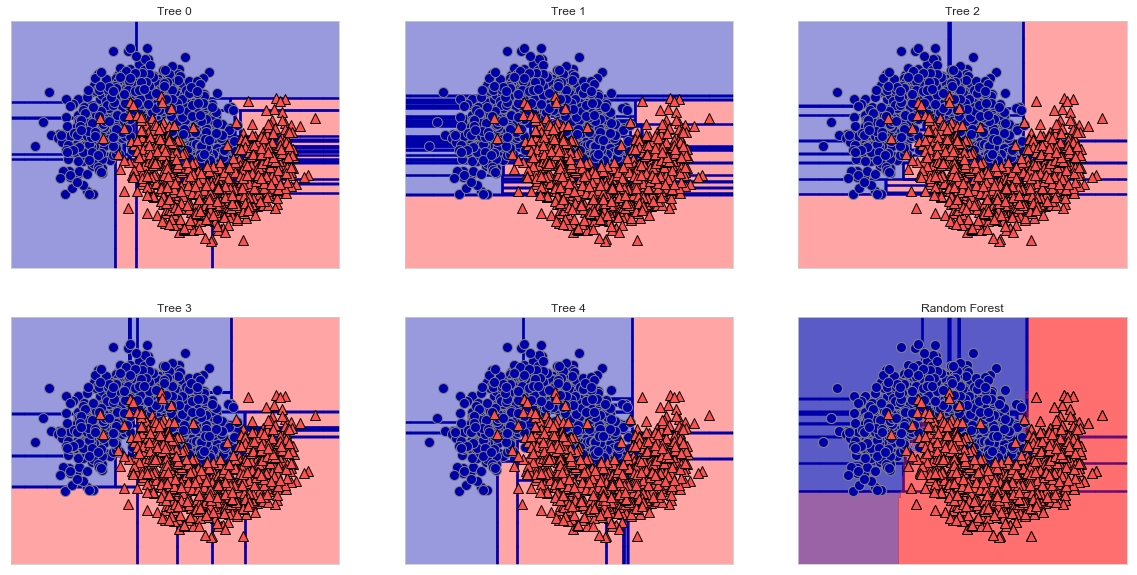

In [503]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4);
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train);

In [505]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,random_state=42) # stratify=cancer.target)

n_features = X_train.shape[1]
print("number of features:", n_features)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Tree Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Tree Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

forest = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=6, max_features=1, bootstrap=True)
forest.fit(X_train, y_train)

print("RF Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("RF Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

number of features: 30
Tree Accuracy on training set: 1.000
Tree Accuracy on test set: 0.930
RF Accuracy on training set: 0.993
RF Accuracy on test set: 0.979


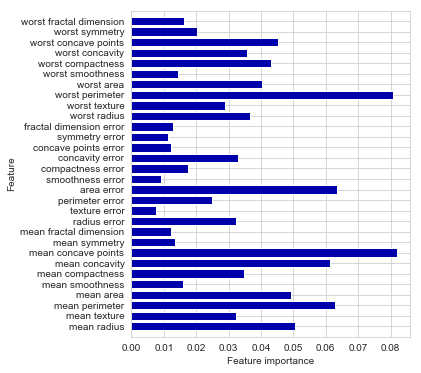

In [507]:
plt.figure(figsize=(5,6))
plot_feature_importances_cancer(forest)

#### Gradient Boosted Regression Trees (Gradient Boosting Machines)

In [508]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=42)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [510]:
for x in [1,2,3,4,5]:
    gbrt = GradientBoostingClassifier(random_state=0, max_depth=x)
    gbrt.fit(X_train, y_train)
    print('max_depth=', x)
    print("Training/Test: {:6.3f} {:6.3f}".format(gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)))

max_depth= 1
Training/Test:  0.991  0.965
max_depth= 2
Training/Test:  1.000  0.951
max_depth= 3
Training/Test:  1.000  0.958
max_depth= 4
Training/Test:  1.000  0.958
max_depth= 5
Training/Test:  1.000  0.965


In [136]:
for x in [1, 0.1, 0.01, 0.001]:
    gbrt = GradientBoostingClassifier(random_state=0, learning_rate=x)
    gbrt.fit(X_train, y_train)

    print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.923
Accuracy on training set: 1.000
Accuracy on test set: 0.958
Accuracy on training set: 0.993
Accuracy on test set: 0.958
Accuracy on training set: 0.629
Accuracy on test set: 0.622


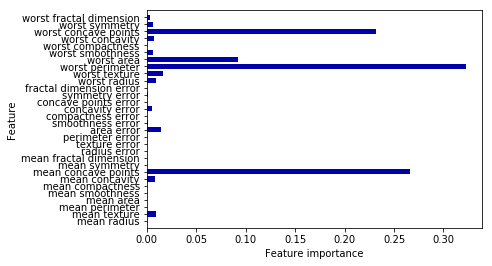

In [75]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

### XGBoost

In [158]:
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

## Parameter Tuning
# model = xgb.XGBClassifier()
# param_dist = {"max_depth": [10,30,50],
#               "min_child_weight" : [1,3,6],
#               "n_estimators": [200],
#               "learning_rate": [0.05, 0.1,0.16],}
# grid_search = GridSearchCV(model, param_grid=param_dist, cv = 5, verbose=1, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_score_)
# print(grid_search.best_estimator_)
# print("Accuracy on test set: {:.3f}".format(grid_search.score(X_test, y_test)))

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

model = xgb.XGBClassifier(max_depth=10, min_child_weight=6,  n_estimators=200,
                          n_jobs=-1 , verbose=10, learning_rate=0.16)
model.fit(X_train,y_train)
print("Training/Test: {:6.3f} {:6.3f}".format(model.score(X_train, y_train), model.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.979


In [163]:
params = {
      #'objective': 'reg:linear', 
      'objective': 'binary:logistic',
      #'eval_metric': 'rmse',
      'eta': 0.001,
      'max_depth': 10, 
      'subsample': 0.6, 
      'colsample_bytree': 0.6,
      'alpha':0.001,
      'random_state': 42, 
      'silent': True,
}

train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

tr_data = xgb.DMatrix(train_X, train_y)
va_data = xgb.DMatrix(val_X, val_y)

watchlist = [(tr_data, 'train'), (va_data, 'valid')]

model_xgb = xgb.train(params, tr_data, 2000, watchlist, maximize=False, early_stopping_rounds=20, verbose_eval=100)

#dtest = xgb.DMatrix(test_X)
#xgb_pred_y = np.expm1(model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit))
#pred_test_xgb, model_xgb = run_xgb(dev_X, dev_y, val_X, val_y, X_test)
print("XGB Training Completed...")

[0]	train-error:0.063536	valid-error:0.0625
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 20 rounds.
Stopping. Best iteration:
[13]	train-error:0.019337	valid-error:0.046875

XGB Training Completed...


##### Strengths, weaknesses and parameters

#### Kernelized Support Vector Machines
#### Linear Models and Non-linear Features

KNeighborsClassifier cv score: 1.00+-0.000
LogisticRegression   cv score: 0.62+-0.140


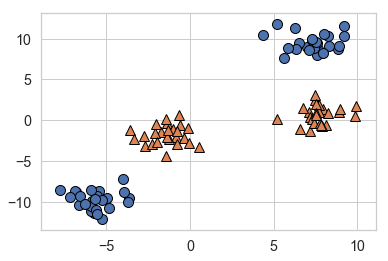

In [170]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

knn = KNeighborsClassifier()
logreg = LogisticRegression()

mods = [knn, logreg]
for mod in mods:
    kfold = KFold(n_splits=7, shuffle=True, random_state=0)
    scores = cross_val_score(mod, X, y, cv=kfold)
    print('{:20} cv score: {:.2f}+-{:.3f}'.format(mod.__class__.__name__,
                                                  scores.mean(), scores.std()))

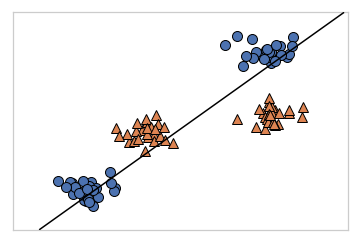

In [175]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
logreg = LogisticRegression().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X);
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

Text(0.5, 0, 'feature1 ** 2')

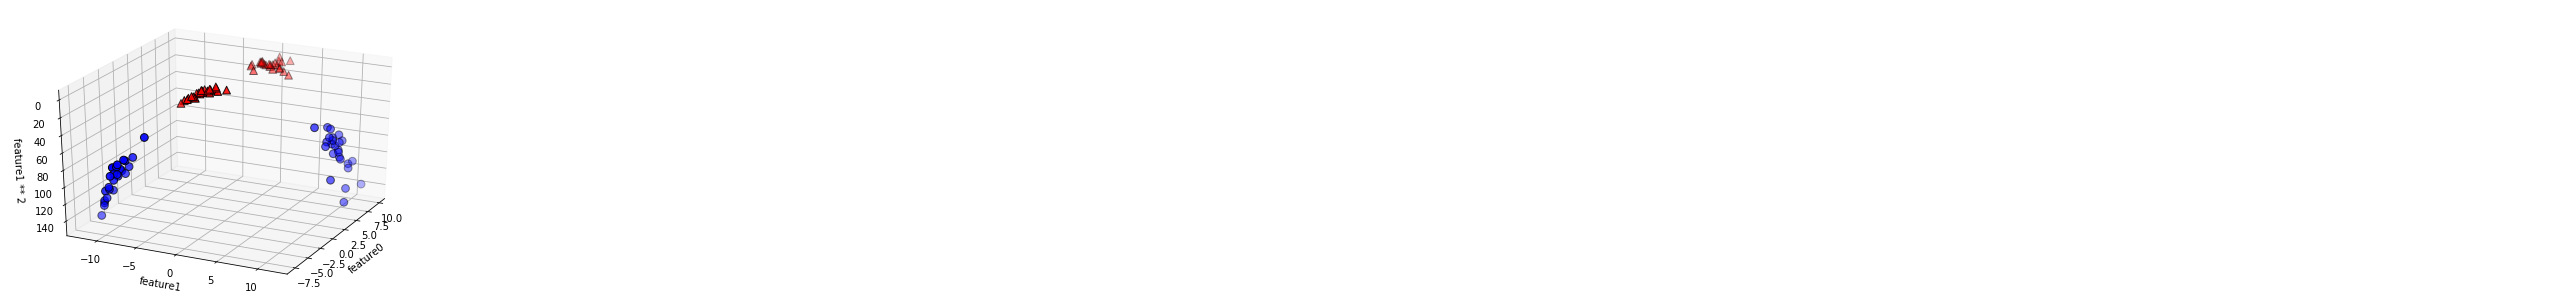

In [78]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/home/andy/checkout/scikit-learn/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

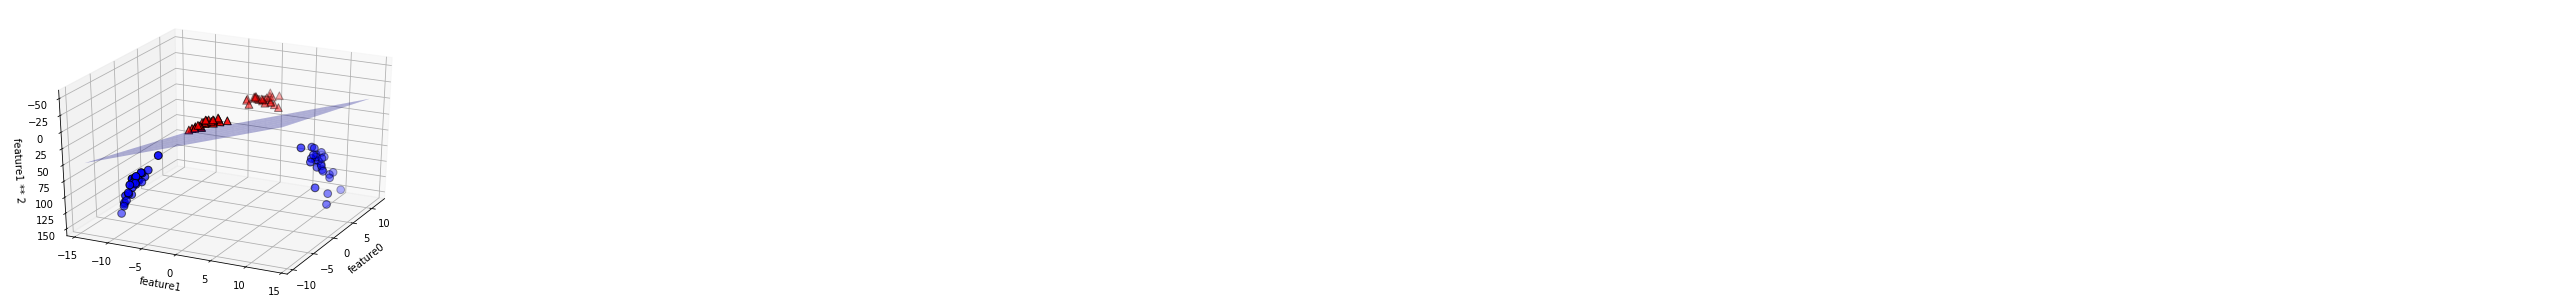

In [79]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'Feature 1')

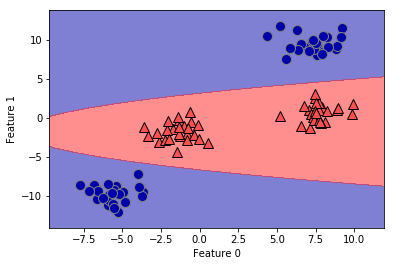

In [80]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### The Kernel Trick
#### Understanding SVMs
\begin{align*}
\end{align*}

Text(0, 0.5, 'Feature 1')

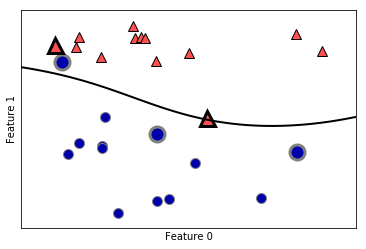

In [81]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Tuning SVM parameters

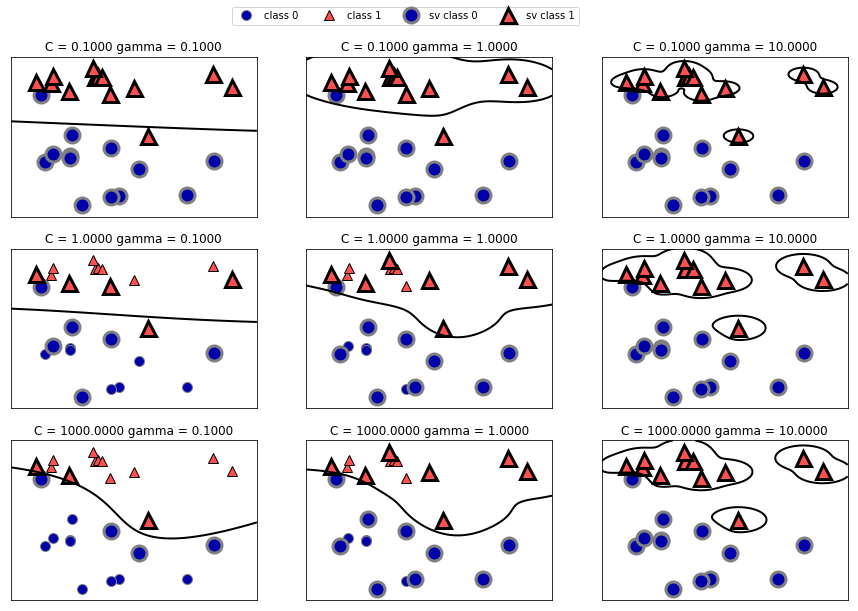

In [82]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


Text(0, 0.5, 'Feature magnitude')

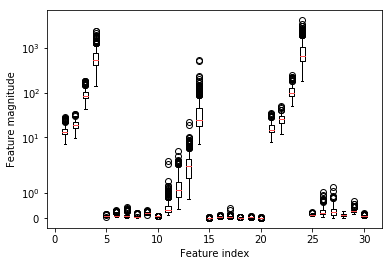

In [84]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

##### Preprocessing data for SVMs

In [85]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [86]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [87]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


In [88]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


#### Strengths, weaknesses and parameters

### Neural Networks (Deep Learning)
#### The Neural Network Model

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())

ModuleNotFoundError: No module named 'graphviz'

In [4]:
display(mglearn.plots.plot_single_hidden_layer_graph())

ModuleNotFoundError: No module named 'graphviz'

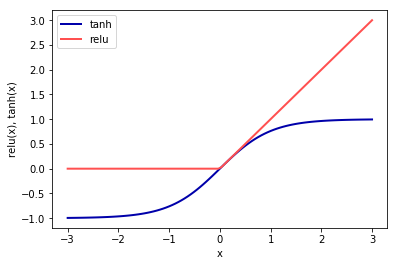

In [6]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line),       label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)");

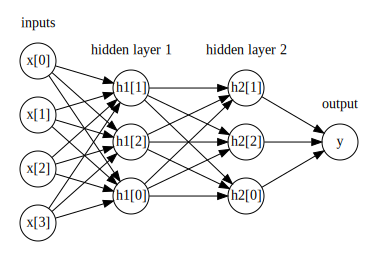

In [92]:
mglearn.plots.plot_two_hidden_layer_graph()

#### Tuning Neural Networks <br>
MLP <br>
    Sensitive to feature scaling. <br>
    Increase max_iter to improve accuracy. <br>
    

Text(0,0.5,'Feature 1')

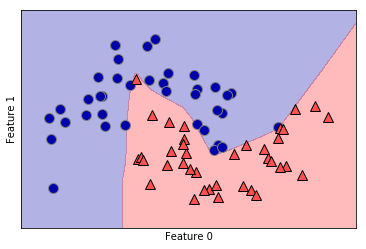

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets       import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

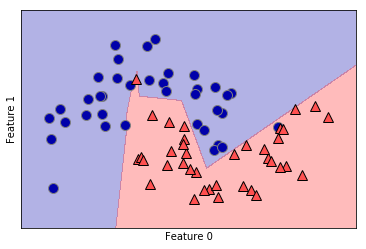

In [14]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

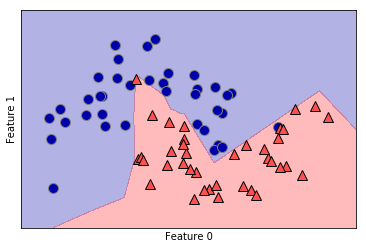

In [15]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

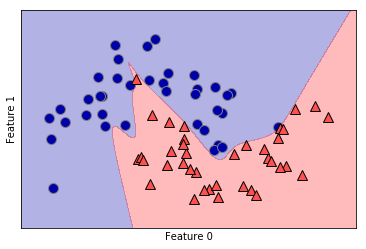

In [17]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

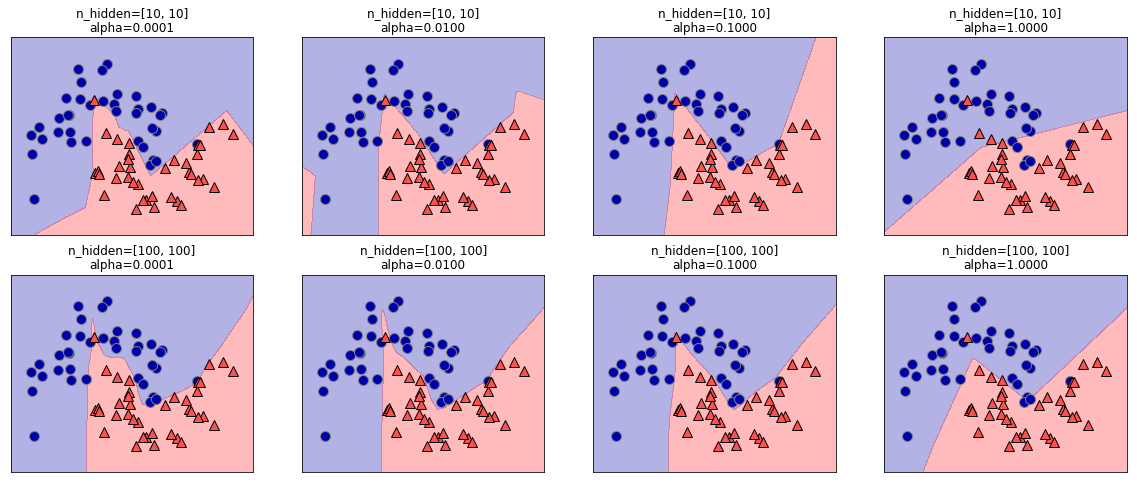

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

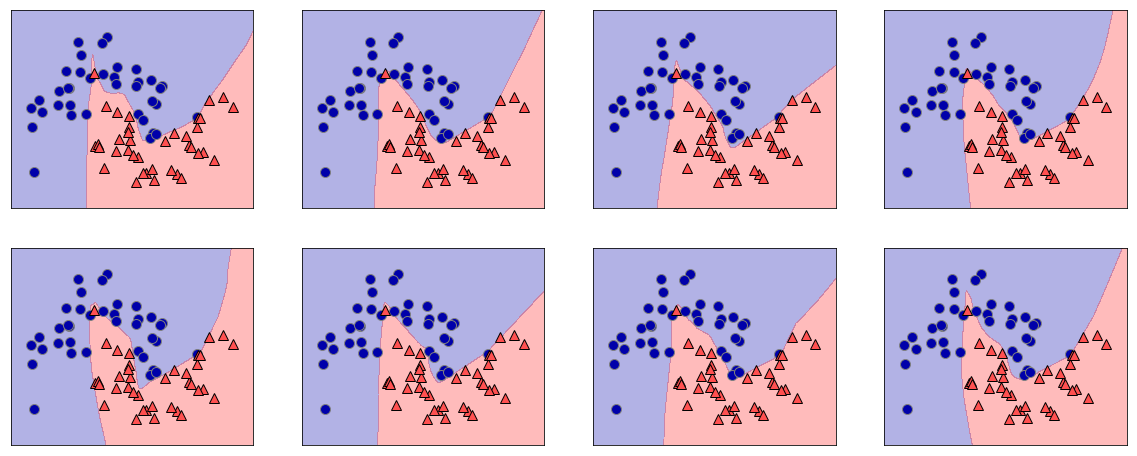

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[  28.11    39.28   188.5   2501.       0.163    0.345    0.427    0.201
    0.304    0.097    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.079    0.03    36.04    49.54   251.2   4254.
    0.223    1.058    1.252    0.291    0.664    0.207]


In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.92
Accuracy on test set: 0.94


In [91]:
# MLP is sensitive to feature scaling

# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/Users/William/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [93]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


In [112]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


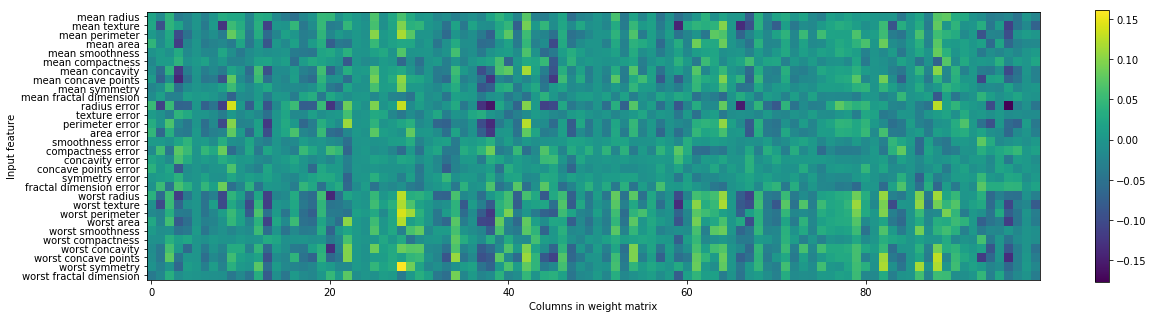

In [115]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar();

In [127]:
nn_mean_coef = mlp.coefs_[0].mean(axis=1)

In [175]:
from sklearn.ensemble import RandomForestClassifier

# train
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

# feature importance
rf_ft_imp = rf.feature_importances_
# correlation b/t rf_ft_imp and nn_mean_coef
print(np.corrcoef(rf_ft_imp, nn_mean_coef))

0.972027972027972
[[ 1.   -0.34]
 [-0.34  1.  ]]


#### Strengths, weaknesses and parameters
##### Estimating complexity in neural networks

### Uncertainty estimates from classifiers

In [178]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)
print(X_train.shape, X_test.shape)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

(75, 2) (25, 2)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

#### The Decision Function

In [106]:
print("X_test.shape:", X_test.shape)
print("Decision function shape:",
      gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
Decision function shape: (25,)


In [107]:
# show the first few entries of decision_function
print("Decision function:", gbrt.decision_function(X_test)[:6])

Decision function: [ 4.136 -1.702 -3.951 -3.626  4.29   3.662]


In [108]:
print("Thresholded decision function:\n",
      gbrt.decision_function(X_test) > 0)
print("Predictions:\n", gbrt.predict(X_test))

Thresholded decision function:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [109]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions:",
      np.all(pred == gbrt.predict(X_test)))

pred is equal to predictions: True


In [110]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


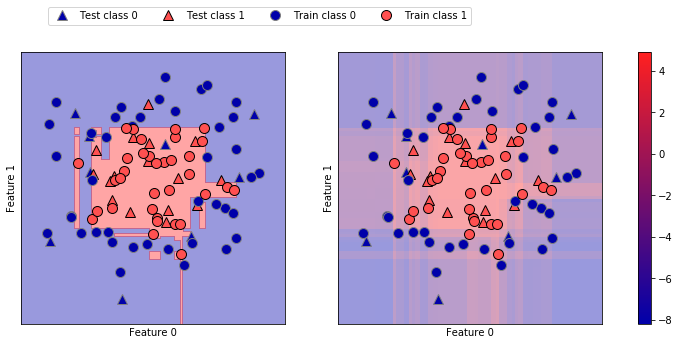

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

#### Predicting Probabilities

In [112]:
print("Shape of probabilities:", gbrt.predict_proba(X_test).shape)

Shape of probabilities: (25, 2)


In [113]:
# show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test[:6]))

Predicted probabilities:
[[0.016 0.984]
 [0.846 0.154]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]]


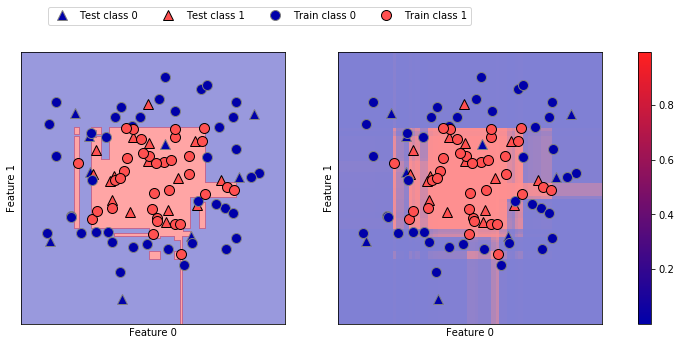

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

![classifier_comparison](images/classifier_comparison.png)

#### Uncertainty in multiclass classification

In [115]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [116]:
print("Decision function shape:", gbrt.decision_function(X_test).shape)
# plot the first few entries of the decision function
print("Decision function:")
print(gbrt.decision_function(X_test)[:6, :])

Decision function shape: (38, 3)
Decision function:
[[-0.529  1.466 -0.504]
 [ 1.512 -0.496 -0.503]
 [-0.524 -0.468  1.52 ]
 [-0.529  1.466 -0.504]
 [-0.531  1.282  0.215]
 [ 1.512 -0.496 -0.503]]


In [117]:
print("Argmax of decision function:")
print(np.argmax(gbrt.decision_function(X_test), axis=1))
print("Predictions:")
print(gbrt.predict(X_test))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [118]:
# show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test)[:6])
# show that sums across rows are one
print("Sums:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

Predicted probabilities:
[[0.107 0.784 0.109]
 [0.789 0.106 0.105]
 [0.102 0.108 0.789]
 [0.107 0.784 0.109]
 [0.108 0.663 0.228]
 [0.789 0.106 0.105]]
Sums: [1. 1. 1. 1. 1. 1.]


In [119]:
print("Argmax of predicted probabilities:")
print(np.argmax(gbrt.predict_proba(X_test), axis=1))
print("Predictions:")
print(gbrt.predict(X_test))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [120]:
logreg = LogisticRegression()

# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data:", logreg.classes_)
print("predictions:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function:", argmax_dec_func[:10])
print("argmax combined with classes_:",
      logreg.classes_[argmax_dec_func][:10])

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


### Summary and Outlook